# 基底関数と正則化

## 5.2 区分的多項式とスプライン

In [1]:
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP' #全体のフォントを設定

# Limits
x0, xi0, xi1, x1 = -1, 1.5, 4.5, 7
y0, y1 = 0, 4

# Sine line
xgrid = scipy.linspace(x0, x1, 100)
ygrid = scipy.cos(xgrid)+2

# Random sample
size_sample = 60
err_sample = scipy.randn(size_sample)*.3
x_sample = scipy.linspace(x0, x1, size_sample)
y_sample = scipy.cos(x_sample)+2+err_sample

Text(0.5,1,'3次自然スプライン')

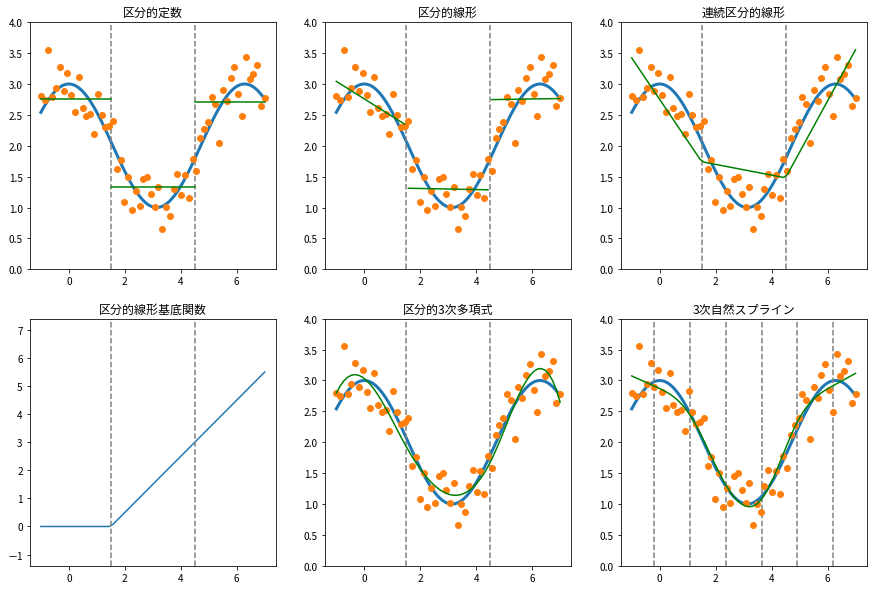

In [3]:
fig51 = plt.figure(51, figsize=(15, 10))
ax1 = fig51.add_subplot(2, 3, 1)
ax1.plot(xgrid, ygrid, linewidth=3)
ax1.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax1.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax1.set_ylim(y0, y1)
ax1.plot(x_sample, y_sample, 'o')

# Split
mask_split1 = x_sample < xi0
mask_split2 = scipy.all([x_sample >= xi0, x_sample < xi1], axis=0)
mask_split3 = xi1 <= x_sample
x_split1 = x_sample[mask_split1]
x_split2 = x_sample[mask_split2]
x_split3 = x_sample[mask_split3]
y_split1 = y_sample[mask_split1]
y_split2 = y_sample[mask_split2]
y_split3 = y_sample[mask_split3]

# 区分的定数
y_split1_mean = y_split1.mean()
y_split2_mean = y_split2.mean()
y_split3_mean = y_split3.mean()
ax1.plot([x0, xi0], [y_split1_mean, y_split1_mean], color='g')
ax1.plot([xi0, xi1], [y_split2_mean, y_split2_mean], color='g')
ax1.plot([xi1, x1], [y_split3_mean, y_split3_mean], color='g')
ax1.set_title(u'区分的定数')

# 区分的線形
y_split1_centered = y_split1-y_split1_mean
y_split2_centered = y_split2-y_split2_mean
y_split3_centered = y_split3-y_split3_mean

beta_split1 = y_split1_centered.dot(x_split1)/(x_split1*x_split1).sum()
beta_split2 = y_split2_centered.dot(x_split2)/(x_split2*x_split2).sum()
beta_split3 = y_split3_centered.dot(x_split3)/(x_split3*x_split3).sum()

y_split1_hat = beta_split1*x_split1+y_split1_mean
y_split2_hat = beta_split2*x_split2+y_split2_mean
y_split3_hat = beta_split3*x_split3+y_split3_mean

ax2 = fig51.add_subplot(2, 3, 2)
ax2.plot(xgrid, ygrid, linewidth=3)
ax2.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax2.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax2.set_ylim(y0, y1)
ax2.plot(x_sample, y_sample, 'o')

ax2.plot(x_split1, y_split1_hat, color='g')
ax2.plot(x_split2, y_split2_hat, color='g')
ax2.plot(x_split3, y_split3_hat, color='g')
ax2.set_title(u'区分的線形')

# 連続区分的線形
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.where(x_sample < xi0, 0, x_sample-xi0)
h4 = scipy.where(x_sample < xi1, 0, x_sample-xi1)
H = scipy.vstack((h1, h2, h3, h4)).T

## 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat = H @ beta

ax3 = fig51.add_subplot(2, 3, 3)
ax3.plot(xgrid, ygrid, linewidth=3)
ax3.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax3.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax3.set_ylim(y0, y1)
ax3.plot(x_sample, y_sample, 'o')
ax3.plot(x_sample, y_hat, color='g')
ax3.set_title(u'連続区分的線形')

ax4 = fig51.add_subplot(2, 3, 4)
ax4.plot(x_sample, h3)
ax4.plot([xi0, xi0], ax4.get_xlim(), '--', color='gray')
ax4.plot([xi1, xi1], ax4.get_xlim(), '--', color='gray')
ax4.set_ylim(ax4.get_xlim())
ax4.set_title(u'区分的線形基底関数')

# 3次スプライン
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.copy(x_sample*x_sample)
h4 = scipy.copy(x_sample*x_sample*x_sample)
h5 = scipy.where(x_sample < xi0, 0, (x_sample-xi0)**3)
h6 = scipy.where(x_sample < xi1, 0, (x_sample-xi1)**3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

## 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat_2 = H @ beta

ax5 = fig51.add_subplot(2, 3, 5)
ax5.plot(xgrid, ygrid, linewidth=3)
ax5.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax5.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax5.set_ylim(y0, y1)
ax5.plot(x_sample, y_sample, 'o')
ax5.plot(x_sample, y_hat_2, color='g')
ax5.set_title(u'区分的3次多項式')

# 3次自然スプライン
xis = scipy.array([.1, .26, .42, .58, .74, .9])*8-1
def d(x:scipy.ndarray, xis:scipy.ndarray, k:int)->scipy.ndarray:
    return (scipy.where(x < xis[k], 0, (x-xis[k])**3)
            - scipy.where(x < xis[-1], 0, (x-xis[-1])**3))/(xis[-1]-xis[k])

h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = d(x_sample, xis, 0)-d(x_sample, xis, -2)
h4 = d(x_sample, xis, 1)-d(x_sample, xis, -2)
h5 = d(x_sample, xis, 2)-d(x_sample, xis, -2)
h6 = d(x_sample, xis, 3)-d(x_sample, xis, -2)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat_3 = H @ beta

ax6 = fig51.add_subplot(2, 3, 6)
ax6.plot(xgrid, ygrid, linewidth=3)
for xi in xis:
    ax6.plot([xi, xi], [y0, y1], '--', color='gray')
ax6.set_ylim(y0, y1)
ax6.plot(x_sample, y_sample, 'o')
ax6.plot(x_sample, y_hat_3, color='g')
ax6.set_title(u'3次自然スプライン')

### 南アフリカの心臓疾患データ

In [3]:
import pandas as pd
import seaborn as sns

In [19]:
df_saheart = pd.read_csv('./data/heart/SAheart.data', index_col=0)
df_saheart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000
